# Symbolic Computation -- Continued

## 1. Simple Exercises

## 2. Complex Functions in Sympy

## 3. Fourier Transform


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

from sympy import *
from sympy.utilities.lambdify import lambdify  

from sympy import init_printing
init_printing() 


## Mini Quiz:

## 1. Integrate a Gaussian from $-\infty$ to $+\infty$:

## $$y = ae^{-bx^2}$$

## Be sure specify that $b > 0$.  Otherwise the integral blows up.

## 2. Sum over the geometric series

## $$\sum_{0}^{\infty} \frac{1} {2^n}$$

## Be sure to specify that $n$ is an integer.

## 3. Find the normalization factor A of the following function 

## $$f(x) = Asin\left(\frac{2n \pi x} {L}\right)$$

## such that $f(x)$ has a norm of 1 over the interval of $x \in (-L/2, L/2)$.

## Be sure to specify $L > 0$ ($L = 0$ would make an unviable function).



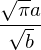

In [2]:
'''
Quiz problem 1 solution

Gaussian integrated

'''

x, a = symbols('x a')
# If you don't specify the sign as positive, the intergral blows up.
b = symbols('b', positive = True)

y = a*exp(-b*x**2)

y_int = integrate(y, (x, -oo, oo))

y_int

In [3]:
'''
Quiz problem 2 solution

1/2^n summed

'''
n = symbols('n', integer = True)

geom_ser = summation(1/2**n, (n, 0, oo))

geom_ser

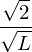

In [4]:
'''
Quiz problem 3 solution

sinusoidal basis function normalized

Sympy is smart enough to figure out the answer is independent of n!

'''
# Note: without knowing L is positive the integrand may not be mathematically valid
L = symbols('L', positive = True)
n = symbols('n', integer = True, positive = True)

f = sin(2*n*pi*x/L)
f_int = integrate(f**2, (x, -L/2, L/2))
f_int  
A = 1/sqrt(f_int)
A

In [5]:
'''Useful for complex Fourier Series and for Fourier Transform'''

print(1j)
print(I.evalf())

1j
1.0*I


In [6]:
# Purely sympy expression
E**(I*pi)

In [7]:
## mixture of sympy and numpy expressions 
E**(1j*pi)

In [8]:
## mixture of sympy and numpy expressions with evalf()
(E**(1j*pi)).evalf()

In [9]:
## mixture of sympy and numpy expressions
np.e**(1j*pi)

In [10]:
## mixture of sympy and numpy expressions with evalf()
(np.e**(1j*pi)).evalf()

In [11]:
(np.e**(1j*pi)).evalf()

In [12]:
## purely numpy expressions
np.e**(1j*np.pi)

(-1+1.2246467991473532e-16j)

## Conclusion: Generally, DON'T mix numpy and sympy expressions.

## Sympy's plotting function

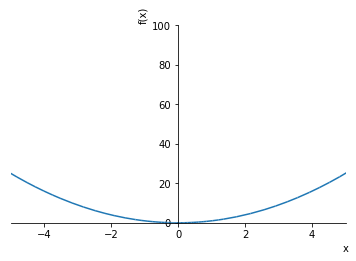

In [13]:
from sympy.abc import x
f = x**2
# note the difference between the tuple that specify the range in which to evalute the function
# and the keyword variable that specifies the range of plotting
plot(f, (x, -10, 10), xlim = (-5, 5))

# This tells you underneath it's still matplotlib
plt.show()

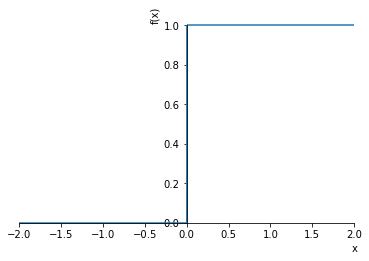

In [14]:
# The Heaviside step function
f = Heaviside(x)
plot(f, (x, -2, 2))
plt.show()

## Mini-breakout: 

- ## Creat a tophat function:

$$f(x) = \begin{cases} 
      0 & x\leq -w/2 \\
      1 & -w/2 < x < w/2 \\
      0 & x \geq w/2
\end{cases}$$

- ## Specify w = 2.

- ## Evaluate and plot the function between $x = -5$ and $5$.

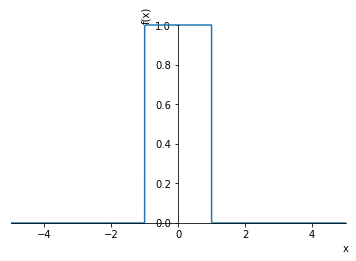

In [15]:
'''
Mini-breakout solution

Note that without specifying w to be a non-zero quantity (in this case, positive),
you can't do symbolic FT transform below.
'''
w = symbols('w', positive = True)
tophat = Heaviside(x + w/2) - Heaviside(x - w/2)
plot(tophat.subs(w, 2), (x, -5, 5))

## Big Breakout Exercise:

## Two simultaneous animations -- tophat with changing width and its FT sqaured.

## Fourier Tranform 

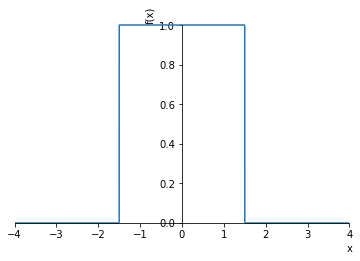

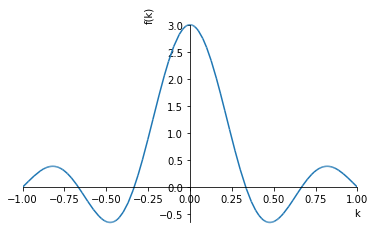

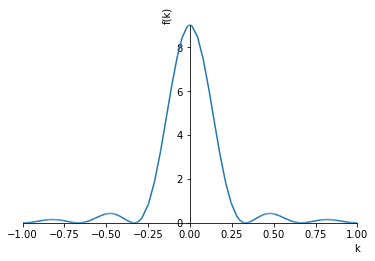

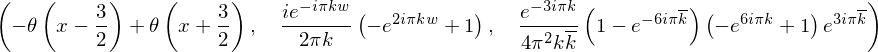

In [16]:
'''

Note: We specify the width after FT!

Qustion: what do you think is going to happen to the width of the FT if 
I make the width of the tophat wider?

Try it -- do you get what you expected?

Why??

There are two explanations -- first I will offer one from classical physics:

https://en.wikipedia.org/wiki/Fraunhofer_diffraction_(mathematics)#Slit_of_infinite_depth


'''
k = symbols('k')

ft = fourier_transform(tophat, x, k)

wid = 3

xlo = -4
xhi = 4
klo = -1
khi = 1

tophat_w = tophat.subs(w, wid)
plot(tophat_w, (x, xlo, xhi))   
# by default the real part is plotted

ft_w = ft.subs(w, wid)
plot(ft_w, (k, klo, khi))   
# if you want to take a look at the real and imaginary parts 
# -- takes a while
# plot(re(ft.subs(w, wid)), (k, klo, khi))   
# plot(im(ft.subs(w, wid)), (k, klo, khi))   
# So, there is no imaginary part, because the the answer is 
# a purely real function.  If it's Methods, I will ask you to show that
# it's basically the sinc function (closely to the Bessell function):
# http://mathworld.wolfram.com/SincFunction.html

# This is what you really want to plot
# -- because as a physicist, this is what you measure.
ft2 = ft_w*conjugate(ft_w)
plot(ft2, (k, klo, khi))   

tophat_w, ft, ft2

## ft_w is an analytical function that you can lambdify and apply it to numpy arrays -- this is another way to generate plots.

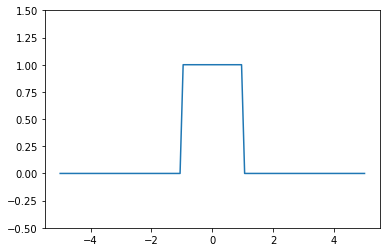

In [17]:
'''
Unfortunately lambdify can't be applied to continuous function.  So to get the numpy version of 
the tophat function itself, we have to try something else.

You know I don't like for loops...well, there is another way

'''
def tophat_single(x_single, a = 2):
    if x_single < -a:
        return 0
    elif x_single > a:
        return 0
    else:
        return 1
    
tophat_np = np.vectorize(tophat_single)

xval = np.linspace(-5, 5, 100)
# yval = tophat(xval)
# Or 
yval = tophat_np(xval, a = 1)
plt.plot(xval, yval)
plt.ylim(-0.5, 1.5)

## Breakout Exercise:

- ## Create a normalized Gaussian function with a mean of 0, in sympy.  Leave $\sigma$ as a parameter (without specifying its value).

- ## Find out its Fourier Transform

- ## Specify the value of $\sigma$

- ## Plot the Gaussian and its Fourier Transform

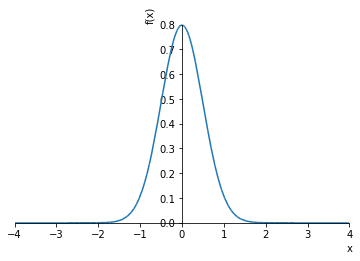

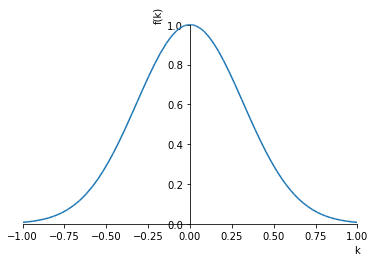

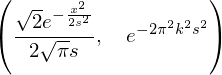

In [18]:
''' 
Breakout Exercise Solution

Add 

1. Parseval's Theorem
2. Estimate width (1-sigma)
3. Demonstration Uncertainty Principle

FT of a Gaussian is a Gaussian!
Note: sympy's def of FT: integral(f(x)*e**(-2pi*i*xk)*dx, -oo, +oo).  
The inclusion of 2*pi in the exponent is popular in QM. 
See Boas p. 386, problem 7.35.

This is HW4, #5.


''' 
import sympy.plotting as symplt 
from sympy.abc import x, k 

s = symbols('s', positive = True)

f = (1/(s*sqrt(2*pi))*exp(-x**2/(2*s**2)))
ft = fourier_transform(f, x, k)

xlo = -4.
xhi = 4.
klo = -1.
khi = 1.

sig_val = 0.5

f_plot = symplt.plot(f.subs(s, sig_val), (x, xlo, xhi), xlim = [-4, 4])   
f_plot[0].line_color = 'k'
ft_plot = symplt.plot(ft.subs(s, sig_val), (k, klo, khi), xlimg = [-1, 1])   
ft_plot[0].line_color = 'k'

f, ft

## Big Breakout Exercise:

## Two simultaneous animations -- tophat with changing width and its FT sqaured.

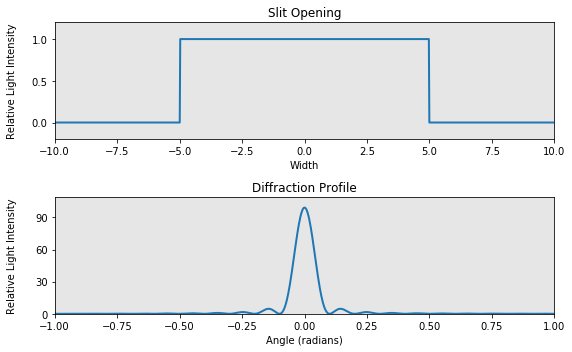

In [19]:
'''
Breakout Solution: 

Diffraction animation.

For more details:

https://matplotlib.org/api/animation_api.html

[For more notes see display_animation_jupyter_notebook.ipynb under Examples]
'''


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import animation, rc
from sympy import *

from IPython.display import HTML


def tophat_single(x, a = 2.):
    if x < -a:
        return 0
    elif x > a:
        return 0
    else:
        return 1

x, k = symbols('x k')
w = symbols('w', positive = True)
tophat = Heaviside(x + w) - Heaviside(x - w)

ft = fourier_transform(tophat, x, k)

fig = plt.figure(figsize = (8, 5))
ax1 = fig.add_subplot(211, xlim=(-10, 10), ylim=(-0.2, 1.2))
#, aspect='equal', autoscale_on=False, xlim=(-5, 5), ylim=(-0.2, 1.2))
ax2 = fig.add_subplot(212, xlim=(-1, 1)) #, autoscale_on = True) #, ylim=(-0.2, 100.))
#, aspect='equal', autoscale_on=False, xlim=(-5, 5), ylim=(-0.2, 1.2))
## the value sets the level of gray 

ax1.set_title('Slit Opening')
ax1.set_xlabel('Width')
ax1.set_ylabel('Relative Light Intensity')
ax1.yaxis.set_label_coords(-0.075,0.5)
ax1.set_facecolor('0.9')

ax2.set_title('Diffraction Profile')
ax2.set_ylabel('Relative Light Intensity')
ax2.set_xlabel('Angle (radians)')
ax2.yaxis.set_label_coords(-0.075, 0.5)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.locator_params(axis = 'y', tight = True,  nbins=4)
ax2.set_facecolor('0.9')

tophat_np = np.vectorize(tophat_single)

x_arr = np.linspace(-10, 10, 1000)
k_arr = np.linspace(-1, 1, 1000)

a_start = 1.

line1, = ax1.plot([], [], '-', lw=2)
line2, = ax2.plot([], [], '-', lw=2)

plt.tight_layout()

# ******* animation *******  
# init(): establishes the base frame -- empty data for 2 line objects. 
# It tells the animation function which objects on the plot to update 
# after each frame.

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

def animate(i):
    
    a = a_start + i/50.0
    
    y_arr = tophat_np(x_arr, a)
    line1.set_data(x_arr, y_arr)

    ft_w = ft.subs(w, a)

    tophat_ft = lambdify(k, ft_w, 'numpy')
    ypr = tophat_ft(k_arr)
    y_arr2 = (ypr*np.conj(ypr)).real

    ax2.set_ylim(0,y_arr2.max()*1.1)


    line2.set_data(k_arr, y_arr2)
    return line1, line2


# This object needs to persist, so it must be assigned to a variable. 
# Parameters: 200 frame animation with a 25ms delay between frames.
# blit keyword: this tells the animation to only 
# re-draw the parts of the plot which have changed: 
# an effective strategy to play the animations much more quickly.
diffrac_ani = animation.FuncAnimation(fig, animate, frames = 200, init_func=init,
                              interval=25, blit=True)

# ******* if you want to save the animation to mp4 *******
# Requires ffmpeg installed.  
# diffrac_ani.save('diffract_animation.mp4', fps=30, dpi = 200, extra_args=['-vcodec', 'libx264'])
# print('Animation saved')

diffrac_html5 = diffrac_ani.to_html5_video()
## This turns on inline as backend.  
plt.ion()
HTML(diffrac_html5)
# I also keep a copy of this animation at
# https://www.ocf.berkeley.edu/~xhuang/blog/?page_id=52


## End of Week14-2